In [1]:
from numpy import *
from pandas import * 
import seaborn as sns
import matplotlib.pyplot as plt
set_option('display.max_columns',None)
import datetime as dt

In [2]:
data=read_csv('marketing_data.csv')
data.head()

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Response,Complain,Country
0,1826,1970,Graduation,Divorced,"$84,835.00",0,0,6/16/14,0,189,104,379,111,189,218,1,4,4,6,1,0,0,0,0,0,1,0,SP
1,1,1961,Graduation,Single,"$57,091.00",0,0,6/15/14,0,464,5,64,7,0,37,1,7,3,7,5,0,0,0,0,1,1,0,CA
2,10476,1958,Graduation,Married,"$67,267.00",0,1,5/13/14,0,134,11,59,15,2,30,1,3,2,5,2,0,0,0,0,0,0,0,US
3,1386,1967,Graduation,Together,"$32,474.00",1,1,5/11/14,0,10,0,1,0,0,0,1,1,0,2,7,0,0,0,0,0,0,0,AUS
4,5371,1989,Graduation,Single,"$21,474.00",1,0,4/8/14,0,6,16,24,11,0,34,2,3,1,2,7,1,0,0,0,0,1,0,SP


In [3]:
data.columns=data.columns.str.lower()
data.columns

Index(['id', 'year_birth', 'education', 'marital_status', ' income ',
       'kidhome', 'teenhome', 'dt_customer', 'recency', 'mntwines',
       'mntfruits', 'mntmeatproducts', 'mntfishproducts', 'mntsweetproducts',
       'mntgoldprods', 'numdealspurchases', 'numwebpurchases',
       'numcatalogpurchases', 'numstorepurchases', 'numwebvisitsmonth',
       'acceptedcmp3', 'acceptedcmp4', 'acceptedcmp5', 'acceptedcmp1',
       'acceptedcmp2', 'response', 'complain', 'country'],
      dtype='object')

In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2240 entries, 0 to 2239
Data columns (total 28 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   id                   2240 non-null   int64 
 1   year_birth           2240 non-null   int64 
 2   education            2240 non-null   object
 3   marital_status       2240 non-null   object
 4    income              2216 non-null   object
 5   kidhome              2240 non-null   int64 
 6   teenhome             2240 non-null   int64 
 7   dt_customer          2240 non-null   object
 8   recency              2240 non-null   int64 
 9   mntwines             2240 non-null   int64 
 10  mntfruits            2240 non-null   int64 
 11  mntmeatproducts      2240 non-null   int64 
 12  mntfishproducts      2240 non-null   int64 
 13  mntsweetproducts     2240 non-null   int64 
 14  mntgoldprods         2240 non-null   int64 
 15  numdealspurchases    2240 non-null   int64 
 16  numweb

#          

# Data Cleaning

In [5]:
data.columns=data.columns.str.strip()
data.columns

Index(['id', 'year_birth', 'education', 'marital_status', 'income', 'kidhome',
       'teenhome', 'dt_customer', 'recency', 'mntwines', 'mntfruits',
       'mntmeatproducts', 'mntfishproducts', 'mntsweetproducts',
       'mntgoldprods', 'numdealspurchases', 'numwebpurchases',
       'numcatalogpurchases', 'numstorepurchases', 'numwebvisitsmonth',
       'acceptedcmp3', 'acceptedcmp4', 'acceptedcmp5', 'acceptedcmp1',
       'acceptedcmp2', 'response', 'complain', 'country'],
      dtype='object')

In [6]:
#we observe that income column is in object format, so we need to transform it to int64 or float
data['income']=data['income'].str.strip('$')
data['income']=data['income'].str.replace(',','')
data['income']=to_numeric(data['income'],errors='coerce')
data['income'].dtypes

dtype('float64')

In [7]:
data['income'].dtypes

dtype('float64')

In [8]:
data.isnull().sum().sort_values(ascending=False)[:4]

income        24
country        0
complain       0
year_birth     0
dtype: int64

Text(0.5, 1.0, 'Income Distribution')

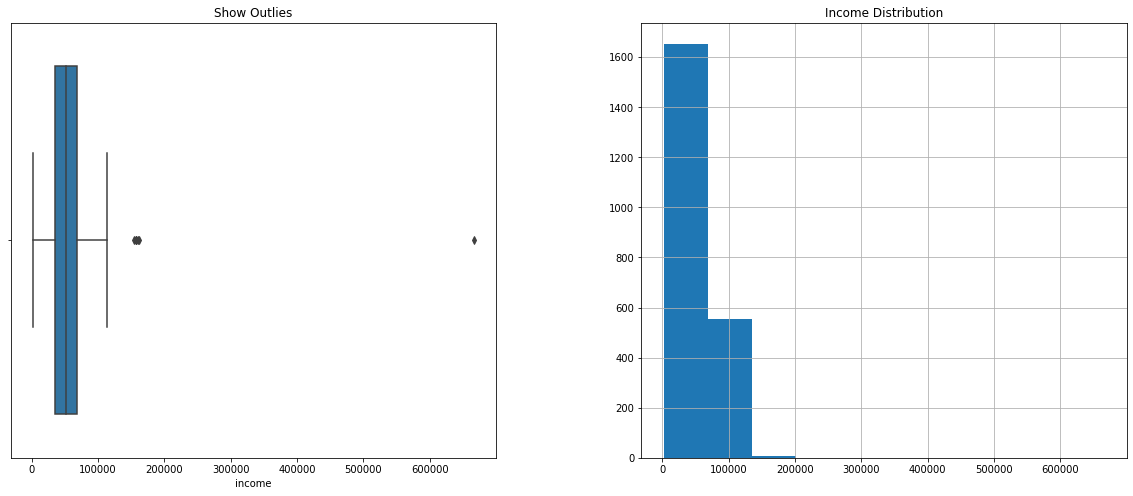

In [9]:
f=plt.figure(figsize=(20,8))
ax=f.add_subplot(121)
sns.boxplot(data=data,x='income',ax=ax)
ax.set_title('Show Outlies')

ax=f.add_subplot(122)
data.hist('income',ax=ax)
ax.set_title('Income Distribution')

In [10]:
#From these plots we can observe that there are outliers in this column, so the way to refill the missing values is median
data.fillna({'income':data['income'].median()},inplace=True)

In [11]:
data.isnull().sum().sort_values(ascending=False)[:2]

country     0
complain    0
dtype: int64

In [12]:
# To make dt_customer more readable, we can do this:
data['dt_customer']=to_datetime(data['dt_customer'])
data.head()

,id,year_birth,education,marital_status,income,kidhome,teenhome,dt_customer,recency,mntwines,mntfruits,mntmeatproducts,mntfishproducts,mntsweetproducts,mntgoldprods,numdealspurchases,numwebpurchases,numcatalogpurchases,numstorepurchases,numwebvisitsmonth,acceptedcmp3,acceptedcmp4,acceptedcmp5,acceptedcmp1,acceptedcmp2,response,complain,country
0,1826,1970,Graduation,Divorced,84835.0,0,0,2014-06-16,0,189,104,379,111,189,218,1,4,4,6,1,0,0,0,0,0,1,0,SP
1,1,1961,Graduation,Single,57091.0,0,0,2014-06-15,0,464,5,64,7,0,37,1,7,3,7,5,0,0,0,0,1,1,0,CA
2,10476,1958,Graduation,Married,67267.0,0,1,2014-05-13,0,134,11,59,15,2,30,1,3,2,5,2,0,0,0,0,0,0,0,US
3,1386,1967,Graduation,Together,32474.0,1,1,2014-05-11,0,10,0,1,0,0,0,1,1,0,2,7,0,0,0,0,0,0,0,AUS
4,5371,1989,Graduation,Single,21474.0,1,0,2014-04-08,0,6,16,24,11,0,34,2,3,1,2,7,1,0,0,0,0,1,0,SP


#            

# Data Exploration

In [13]:
data['marital_status'].value_counts()

Married     864
Together    580
Single      480
Divorced    232
Widow        77
Alone         3
YOLO          2
Absurd        2
Name: marital_status, dtype: int64

Text(0.5, 1.0, 'Marital Status Counts')

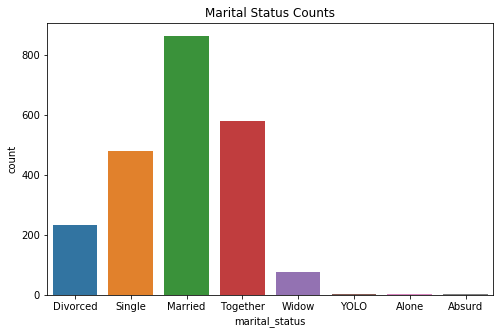

In [14]:
plt.figure(figsize=(8,5))
sns.countplot(x='marital_status',data=data)
plt.title('Marital Status Counts')

### from this plot, we can note that:
- The most popular in data is married
- The second most popular in data is together and single

#                      

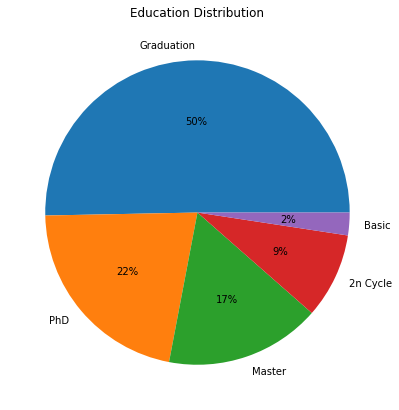

In [15]:
plt.figure(figsize=(10,7))
edu=data['education'].value_counts()
plt.pie(edu.values,labels=edu.index,autopct='%1.f%%')
plt.title('Education Distribution');

### Notes of this plot:
- The most popular education in data is graduation
- A few people who have basic education and 2n cycle

#        

In [16]:
data['age']=dt.date.today().year-data['year_birth']
data.head()

,id,year_birth,education,marital_status,income,kidhome,teenhome,dt_customer,recency,mntwines,mntfruits,mntmeatproducts,mntfishproducts,mntsweetproducts,mntgoldprods,numdealspurchases,numwebpurchases,numcatalogpurchases,numstorepurchases,numwebvisitsmonth,acceptedcmp3,acceptedcmp4,acceptedcmp5,acceptedcmp1,acceptedcmp2,response,complain,country,age
0,1826,1970,Graduation,Divorced,84835.0,0,0,2014-06-16,0,189,104,379,111,189,218,1,4,4,6,1,0,0,0,0,0,1,0,SP,51
1,1,1961,Graduation,Single,57091.0,0,0,2014-06-15,0,464,5,64,7,0,37,1,7,3,7,5,0,0,0,0,1,1,0,CA,60
2,10476,1958,Graduation,Married,67267.0,0,1,2014-05-13,0,134,11,59,15,2,30,1,3,2,5,2,0,0,0,0,0,0,0,US,63
3,1386,1967,Graduation,Together,32474.0,1,1,2014-05-11,0,10,0,1,0,0,0,1,1,0,2,7,0,0,0,0,0,0,0,AUS,54
4,5371,1989,Graduation,Single,21474.0,1,0,2014-04-08,0,6,16,24,11,0,34,2,3,1,2,7,1,0,0,0,0,1,0,SP,32


In [17]:
data['age'].describe()

count    2240.000000
mean       52.194196
std        11.984069
min        25.000000
25%        44.000000
50%        51.000000
75%        62.000000
max       128.000000
Name: age, dtype: float64

Text(0.5, 1.0, 'Ages Distribution')

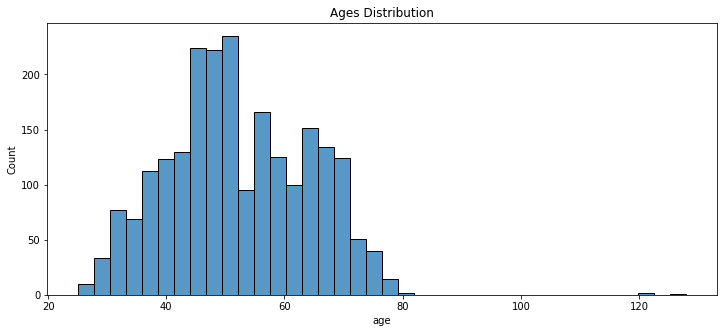

In [18]:
plt.figure(figsize=(12,5))
sns.histplot(data=data,x='age')
plt.title('Ages Distribution')

- Most ages are between 44 and 62

#          

Text(0.5, 1.0, "Distribution of kids in Customers'home")

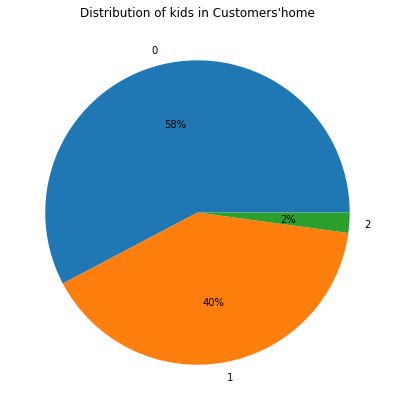

In [19]:
plt.figure(figsize=(10,7))
count=data['kidhome'].value_counts()
plt.pie(count.values,labels=count.index,autopct='%1.0f%%');
plt.title("Distribution of kids in Customers'home")

- Most customers have no children in their homes.
- 40% of them have one child in their home.

#        

Text(0.5, 1.0, 'Teenegers Distribution')

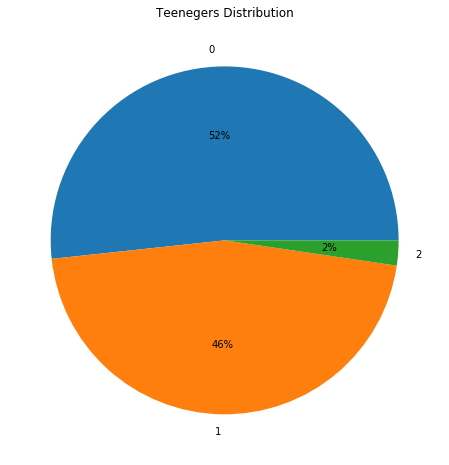

In [20]:
plt.figure(figsize=(12,8))
counts=data['teenhome'].value_counts()
plt.pie(counts.values,labels=counts.index,autopct='%1.0f%%');
plt.title('Teenegers Distribution')

- Most customers have no teenagers in their homes.
- 46% of customers have one teenager in their homes.

#      

In [21]:
data['month_customer']=data['dt_customer'].dt.month
data.head()

,id,year_birth,education,marital_status,income,kidhome,teenhome,dt_customer,recency,mntwines,mntfruits,mntmeatproducts,mntfishproducts,mntsweetproducts,mntgoldprods,numdealspurchases,numwebpurchases,numcatalogpurchases,numstorepurchases,numwebvisitsmonth,acceptedcmp3,acceptedcmp4,acceptedcmp5,acceptedcmp1,acceptedcmp2,response,complain,country,age,month_customer
0,1826,1970,Graduation,Divorced,84835.0,0,0,2014-06-16,0,189,104,379,111,189,218,1,4,4,6,1,0,0,0,0,0,1,0,SP,51,6
1,1,1961,Graduation,Single,57091.0,0,0,2014-06-15,0,464,5,64,7,0,37,1,7,3,7,5,0,0,0,0,1,1,0,CA,60,6
2,10476,1958,Graduation,Married,67267.0,0,1,2014-05-13,0,134,11,59,15,2,30,1,3,2,5,2,0,0,0,0,0,0,0,US,63,5
3,1386,1967,Graduation,Together,32474.0,1,1,2014-05-11,0,10,0,1,0,0,0,1,1,0,2,7,0,0,0,0,0,0,0,AUS,54,5
4,5371,1989,Graduation,Single,21474.0,1,0,2014-04-08,0,6,16,24,11,0,34,2,3,1,2,7,1,0,0,0,0,1,0,SP,32,4


In [22]:
data['year_customer']=data['dt_customer'].dt.year
data.head()

,id,year_birth,education,marital_status,income,kidhome,teenhome,dt_customer,recency,mntwines,mntfruits,mntmeatproducts,mntfishproducts,mntsweetproducts,mntgoldprods,numdealspurchases,numwebpurchases,numcatalogpurchases,numstorepurchases,numwebvisitsmonth,acceptedcmp3,acceptedcmp4,acceptedcmp5,acceptedcmp1,acceptedcmp2,response,complain,country,age,month_customer,year_customer
0,1826,1970,Graduation,Divorced,84835.0,0,0,2014-06-16,0,189,104,379,111,189,218,1,4,4,6,1,0,0,0,0,0,1,0,SP,51,6,2014
1,1,1961,Graduation,Single,57091.0,0,0,2014-06-15,0,464,5,64,7,0,37,1,7,3,7,5,0,0,0,0,1,1,0,CA,60,6,2014
2,10476,1958,Graduation,Married,67267.0,0,1,2014-05-13,0,134,11,59,15,2,30,1,3,2,5,2,0,0,0,0,0,0,0,US,63,5,2014
3,1386,1967,Graduation,Together,32474.0,1,1,2014-05-11,0,10,0,1,0,0,0,1,1,0,2,7,0,0,0,0,0,0,0,AUS,54,5,2014
4,5371,1989,Graduation,Single,21474.0,1,0,2014-04-08,0,6,16,24,11,0,34,2,3,1,2,7,1,0,0,0,0,1,0,SP,32,4,2014


In [23]:
#function to show the precentage of each column in the plot
def show_percent(col):
    plt.figure(figsize=(20,12))
    ax=sns.countplot(data=data,x=col)
    plt.xticks(rotation=90)
    plt.title(f'{col} Distribution')
    
    total=float(len(data))
    for p in ax.patches:
        height=p.get_height()
        percent=(height*100)/total
        ax.text(p.get_x()+p.get_width()/2,height+1,'{:.0f}%'.format(percent),ha='center',weight='bold',fontsize=20)

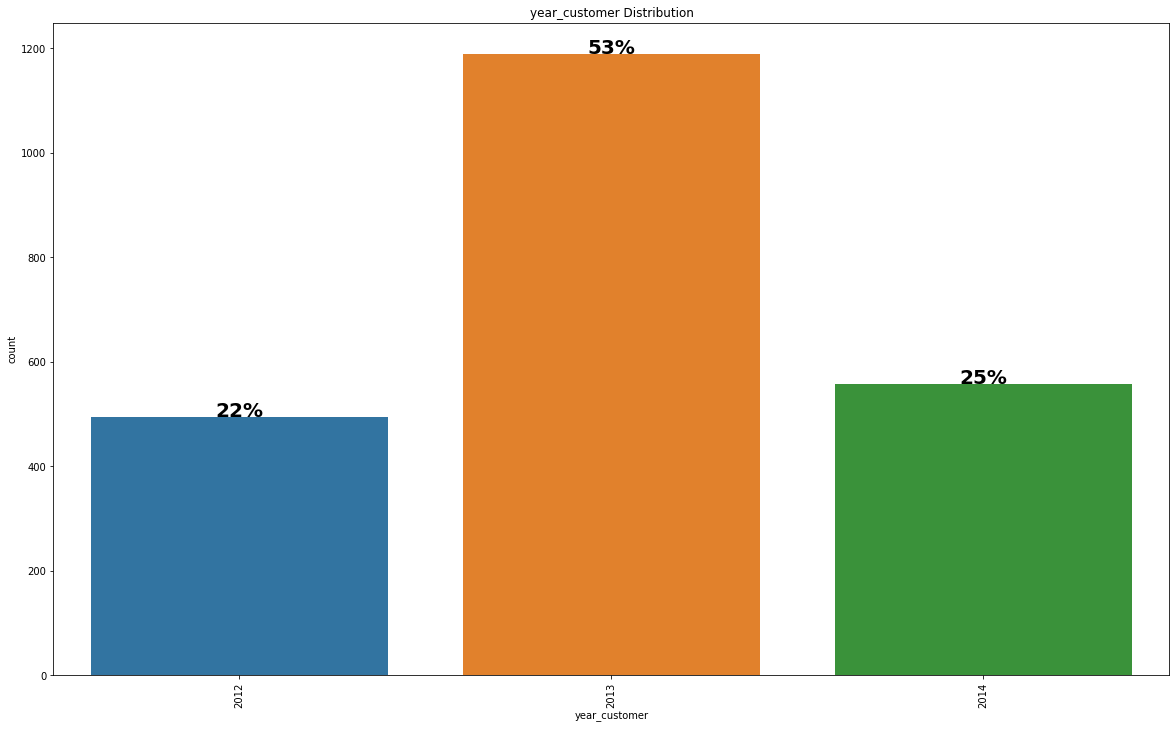

In [24]:
show_percent('year_customer')

### From this plot, we note that:
- Most customers' registration was in 2013. After that, The number of registration is decreasing

#        

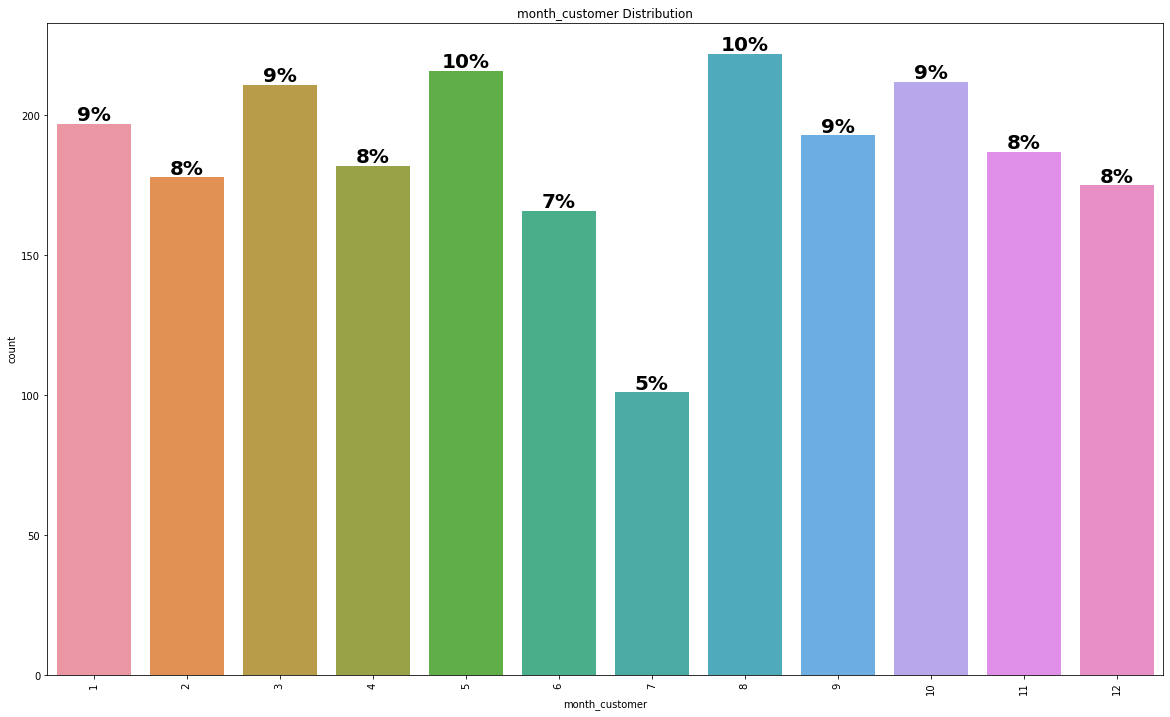

In [25]:
show_percent('month_customer')

- On last 3 years, The registration is fine.
- In July, The numbers of registration decreased.

#           

In [26]:
registration_2012=data[data['year_customer']==2012].month_customer
registration_2013=data[data['year_customer']==2013].month_customer
registration_2014=data[data['year_customer']==2014].month_customer

Text(0.5, 1.0, "The Registration's Numbers in 2014")

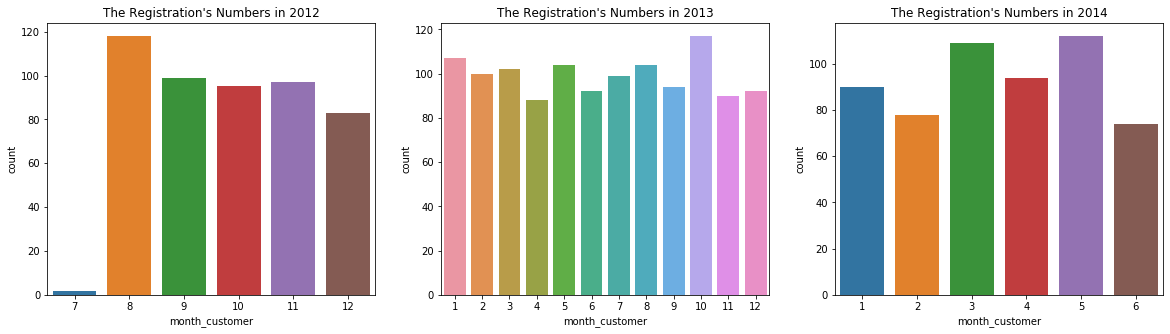

In [27]:
f=plt.figure(figsize=(20,5))
ax=f.add_subplot(131)
sns.countplot(x=registration_2012,data=data,ax=ax)
ax.set_title("The Registration's Numbers in 2012")

ax=f.add_subplot(132)
sns.countplot(x=registration_2013,data=data,ax=ax)
ax.set_title("The Registration's Numbers in 2013")

ax=f.add_subplot(133)
sns.countplot(x=registration_2014,data=data,ax=ax)
ax.set_title("The Registration's Numbers in 2014")

- We should remember the data is from July 2012 to June 2014 so, everything is good in the number of registration.

#   

In [28]:
products=['mntwines','mntfruits','mntmeatproducts','mntfishproducts','mntsweetproducts','mntgoldprods']
data[products].sum().sort_values()

mntfruits            58917
mntsweetproducts     60621
mntfishproducts      84057
mntgoldprods         98609
mntmeatproducts     373968
mntwines            680816
dtype: int64

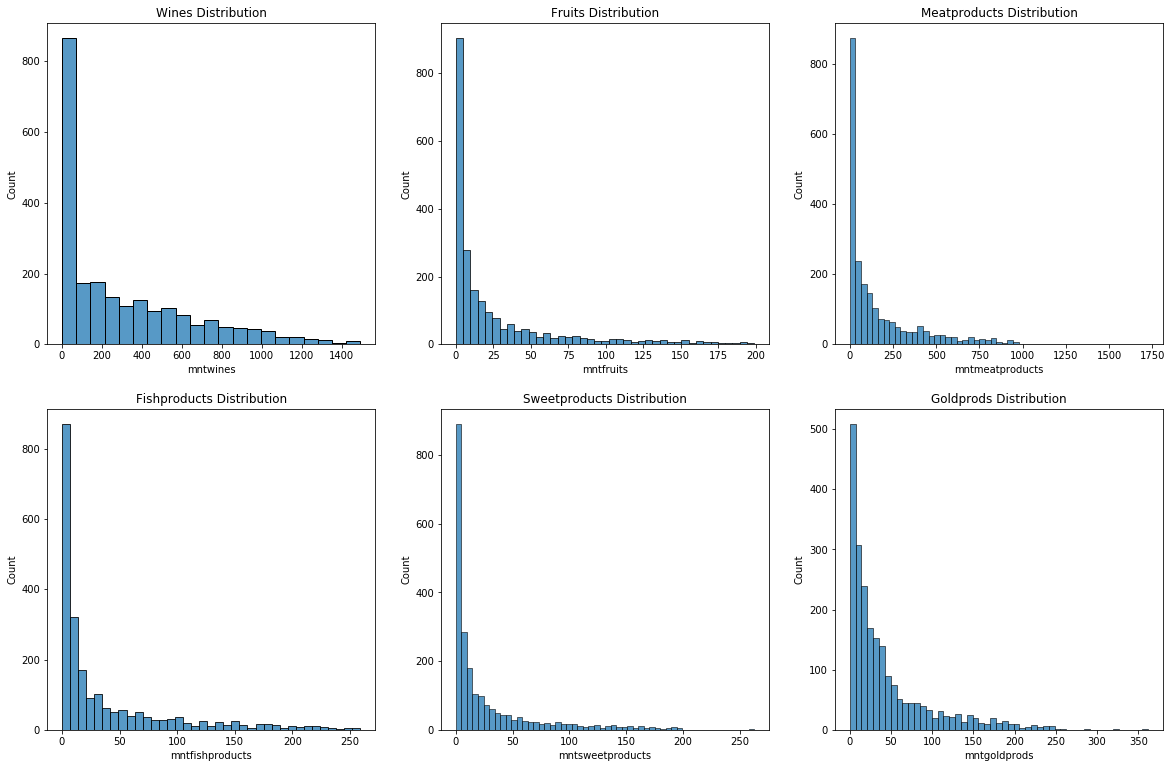

In [29]:
f=plt.figure(figsize=(20,13))
for i,col in enumerate(products):
    ax=f.add_subplot(2,3,i+1)
    sns.histplot(data=data,x=col,ax=ax)
    ax.set_title(f"{col.replace('mnt','').title()} Distribution")

- Most customers spend their money on wines.
- The arrange of money spent are with descending:
    - wines
    - meat
    - gold
    - fish
    - sweet
    - fruits

#       

In [30]:
data[products].describe()

,mntwines,mntfruits,mntmeatproducts,mntfishproducts,mntsweetproducts,mntgoldprods
count,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000
mean,303.935714,26.302232,166.950000,37.525446,27.062946,44.021875
std,336.597393,39.773434,225.715373,54.628979,41.280498,52.167439
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,23.750000,1.000000,16.000000,3.000000,1.000000,9.000000
50%,173.500000,8.000000,67.000000,12.000000,8.000000,24.000000
75%,504.250000,33.000000,232.000000,50.000000,33.000000,56.000000
max,1493.000000,199.000000,1725.000000,259.000000,263.000000,362.000000


### The conclusion of this table is:
- The maxium price is for meat products (1725)
- After that, wines products are (1493)


### The range of some products:
_Wines_ :
    - Most customer spent on wines from 23 to 504
_Fruits_ :
    - Most customer spent on fruits from 1 to 33
_Meats_ :
    - Most customer spent on meats from 16 to 232
_Fishes_ :
    - Most customer spent on fishes from 3 to 50
_Sweets_ :
    - Most customer spent on sweets from 1 to 33
_Gold_ :
    - Most customer spent on gold from 9 to 56

#         

In [31]:
len(data[data['mntgoldprods']==0].mntgoldprods)

61

In [32]:
sum_0_values=[]
for i in products:
    sum_0_values.append(len(data[data[i]==0]))

In [33]:
sum_0_values

[13, 400, 1, 384, 419, 61]

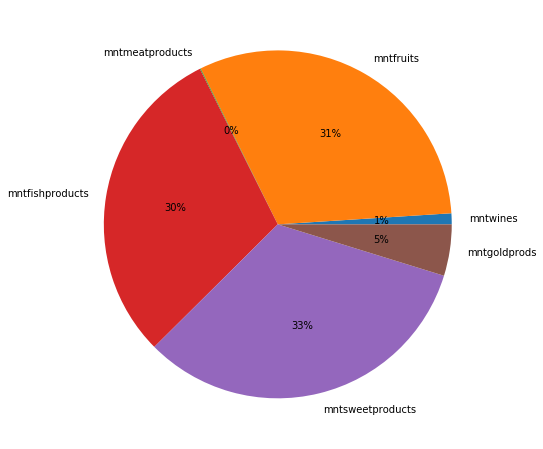

In [34]:
plt.figure(figsize=(12,8))
plt.pie(x=sum_0_values,labels=products,autopct='%1.0f%%');

Text(0.5, 1.0, 'Distribution Of Products Customers Do Not Buy')

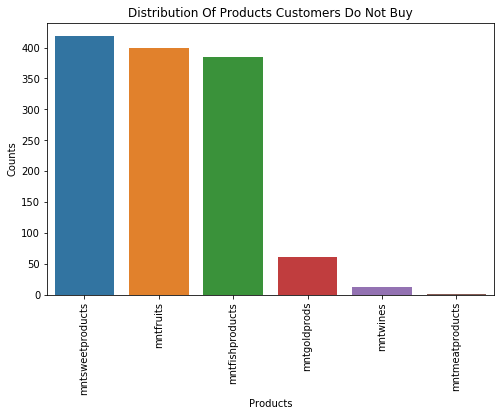

In [35]:
plt.figure(figsize=(8,5))
sns.barplot(x=products,y=sum_0_values,order=['mntsweetproducts','mntfruits','mntfishproducts','mntgoldprods','mntwines','mntmeatproducts'])
plt.xticks(rotation=90)
plt.xlabel('Products')
plt.ylabel('Counts')
plt.title('Distribution Of Products Customers Do Not Buy')

### From this plots, we note that:
- The most products customers buy is:
    - meat
    - wines
    - gold

#          

In [36]:
accept=['acceptedcmp1','acceptedcmp2','acceptedcmp3','acceptedcmp4','acceptedcmp5']
#number of customer accept the camp
accept_num=[]

#number of customer don't accept the camp
not_accept_num=[]

for i in accept:
    accept_num.append(len(data[data[i]==1]))
    not_accept_num.append(len(data[data[i]==0]))

In [37]:
accept_num

[144, 30, 163, 167, 163]

In [38]:
not_accept_num

[2096, 2210, 2077, 2073, 2077]

#      

(array([0, 1, 2, 3, 4]), <a list of 5 Text xticklabel objects>)

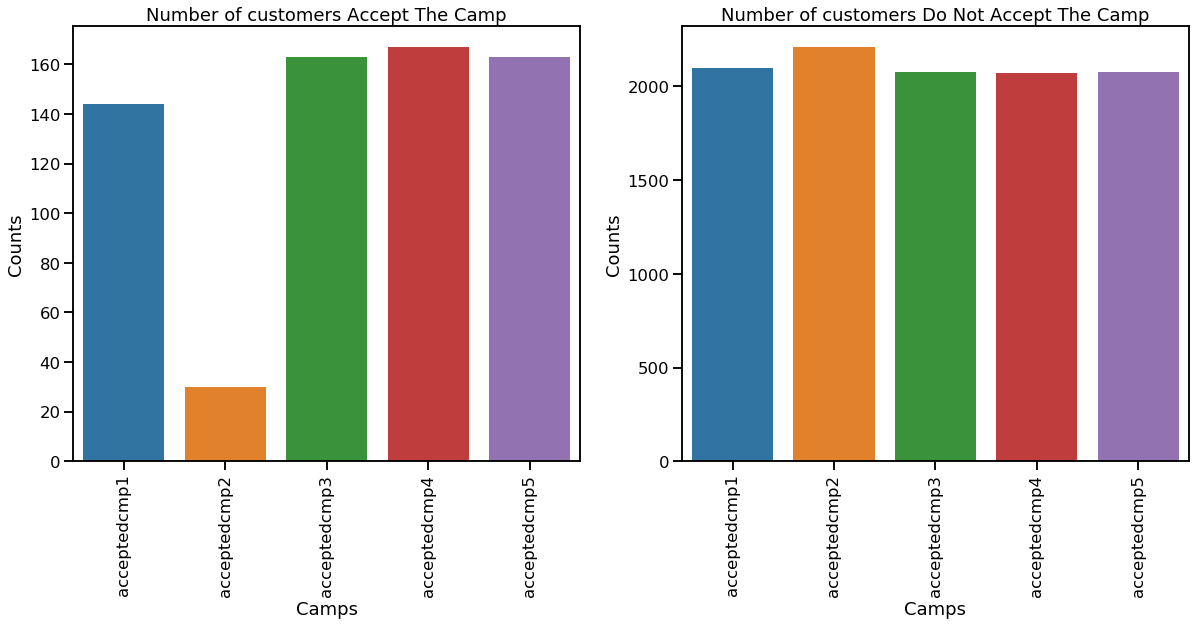

In [39]:
sns.set_context('talk')
f=plt.figure(figsize=(20,8))
ax=f.add_subplot(121)
sns.barplot(x=accept,y=accept_num,ax=ax)
plt.xlabel('Camps')
plt.ylabel('Counts')
plt.xticks(rotation=90)
plt.title('Number of customers Accept The Camp')


ax=f.add_subplot(122)
sns.barplot(x=accept,y=not_accept_num,ax=ax)
plt.xlabel('Camps')
plt.ylabel('Counts')
plt.title('Number of customers Do Not Accept The Camp')
plt.xticks(rotation=90)

### Notes from these plots:
- Most customers don't accept the camp.
- The range of customers accept the camp are between 140 and 160
- In the second camp, we can observe that:
    - Most customers don't accept this camp (almost 30 customers only accepted)

#           

In [40]:
data['income'].describe()

count      2240.000000
mean      52237.975446
std       25037.955891
min        1730.000000
25%       35538.750000
50%       51381.500000
75%       68289.750000
max      666666.000000
Name: income, dtype: float64

Text(0.5, 1.0, 'Income Distribution')

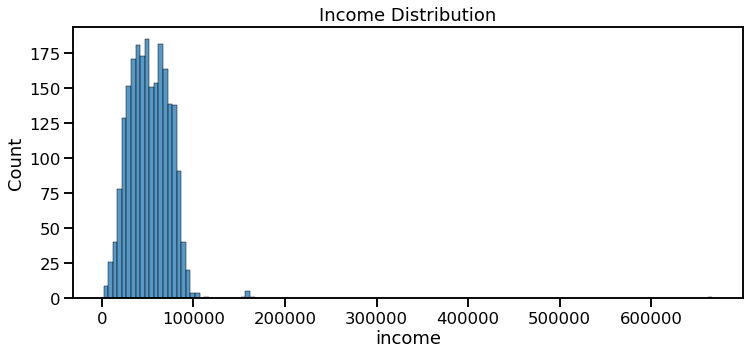

In [41]:
plt.figure(figsize=(12,5))
sns.histplot(data=data,x='income')
plt.title('Income Distribution')

- The range of the income of the most customers is between 35000 and 68000

#        